In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import us
import numpy as np
import plotly.express as px

plt.style.use('ggplot')

## This notebook contains a plotting function that plots the rate of change per state. 

**To do: Look at and save plot of Missouri vs. Massachusetts for slides**

In [2]:
df = pd.read_csv('../vivian_fork/combined_political_covid_percent.csv', index_col=0)

In [3]:
df.head()

,state,never,rarely,sometimes,frequently,always,mask_negative,mask_positive,votesdem,percd,...,percr,electoraldem,electoralrep,pop,blue,red,deaths,cases,percent change deaths,percent change cases
0,AK,0.053429,0.064643,0.092821,0.326393,0.462571,0.118071,0.788964,116454,36.55,...,51.28,0,3,734002,0,1,24,4935,1.263374,2.275397
1,AL,0.081567,0.081090,0.146612,0.215343,0.475313,0.162657,0.690657,729547,34.36,...,62.08,0,9,4908620,0,1,1228,88654,2.000000,4.203578
2,AR,0.090920,0.087253,0.138360,0.220627,0.462867,0.178173,0.683493,380494,33.65,...,60.57,0,6,3039000,0,1,537,40300,1.924681,1.404875
3,AZ,0.049667,0.053200,0.094667,0.147333,0.655000,0.102867,0.802333,1161167,45.13,...,48.67,0,11,7378490,0,1,3322,118223,1.938628,1.901212
4,CA,0.032310,0.030724,0.063690,0.158603,0.714638,0.063034,0.873241,8753788,61.73,...,31.62,55,0,39937500,1,0,6981,476864,1.131809,1.988889


In [13]:
snap = pd.read_csv('../project-5/data/two_month_snapshot.csv', index_col=0)

/Users/alexander.fioto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
def plot_covid_rate(states=['North Carolina']):
    plt.figure(figsize=(14, 6))
    state_dictionary = {}
    for state in states:
        state_df = snap[snap['state'] == state]
        state_df['date'] = pd.to_datetime(state_df['date'])
        state_df.set_index('date', inplace=True)
        state_dictionary[state] = state_df['zeroed_cases']
    for state, series in state_dictionary.items():
        plt.plot(series, label=state)
    plt.legend()
        

/Users/alexander.fioto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



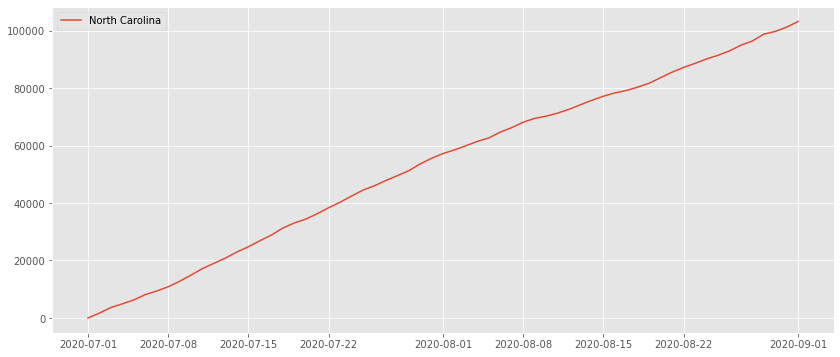

In [54]:
plot_covid_rate()

/Users/alexander.fioto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


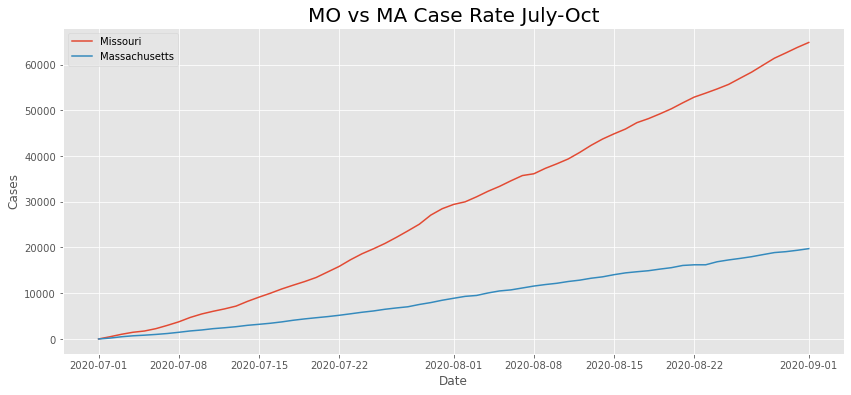

In [16]:
plot_covid_rate(states=['Missouri', 'Massachusetts'])
plt.title('MO vs MA Case Rate July-Oct', fontsize=20)
plt.ylabel('Cases')
plt.xlabel('Date');
plt.savefig('mo_vs_ma.png')

/Users/alexander.fioto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


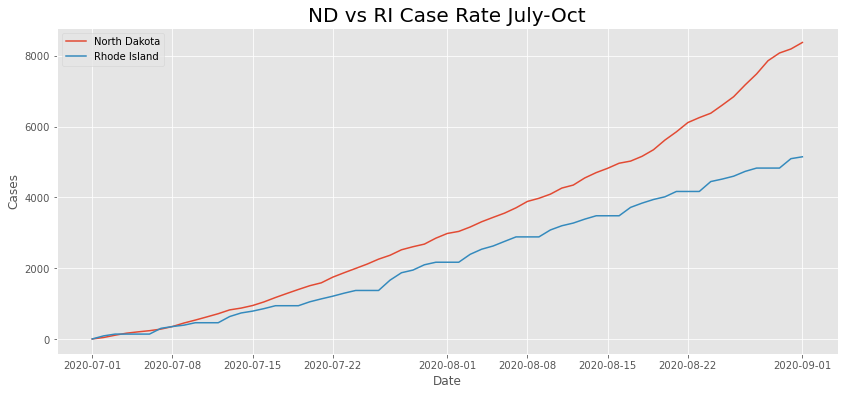

In [21]:
plot_covid_rate(states=['North Dakota', 'Rhode Island'])
plt.title('ND vs RI Case Rate July-Oct', fontsize=20)
plt.ylabel('Cases')
plt.xlabel('Date');
plt.savefig('nd_vs_ri.png')

In [48]:
def plotly_covid_rate(states=['North Carolina']):
    state_dictionary = {}
    title_string = 'COVID-19 Cases for '
    for state in states:
        state_df = snap[snap['state'] == state]
        state_df['date'] = pd.to_datetime(state_df['date'])
        state_df.set_index('date', inplace=True)
        state_dictionary[state] = state_df['zeroed_cases']
        title_string += state + ' '
    fig = px.line(title='MURCA')
    for state, series in state_dictionary.items():
        fig.add_scatter(x=state_df.index, y = series, name=state)
    fig.update_layout(xaxis_title='Date', yaxis_title='Cases')
    fig.show()
        

/Users/alexander.fioto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



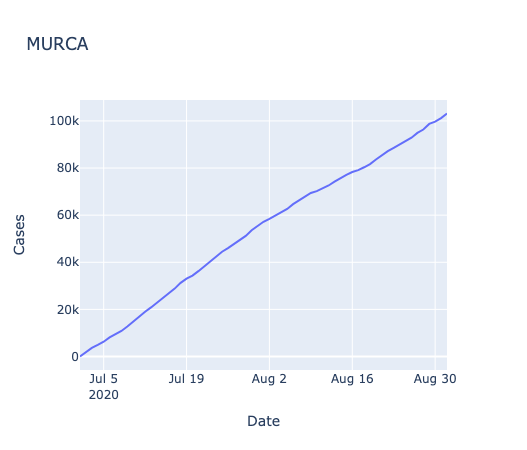

{'North Carolina': date
 2020-07-01         0
 2020-07-02      1697
 2020-07-03      3636
 2020-07-04      4920
 2020-07-05      6281
                ...  
 2020-08-28     96339
 2020-08-29     98718
 2020-08-30     99695
 2020-08-31    101174
 2020-09-01    103151
 Name: zeroed_cases, Length: 63, dtype: int64}

<Figure size 1008x432 with 0 Axes>

In [56]:
plotly_covid_rate(states=['North Carolina'])

In [19]:
state_df = snap[snap['state']=='Alabama']
state_df['date'] = pd.to_datetime(state_df['date'])
state_df.set_index('date', inplace=True)

/Users/alexander.fioto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
state_df.head()

,state,fips,cases,deaths,daily_new_cases,daily_new_deaths,zeroed_cases,zeroed_deaths
date,,,,,,,,
2020-07-01,Alabama,1,38962,972,0.0,0.0,0,0
2020-07-02,Alabama,1,40111,985,1149.0,13.0,1149,13
2020-07-03,Alabama,1,41865,1006,1754.0,21.0,2903,34
2020-07-04,Alabama,1,42862,1007,997.0,1.0,3900,35
2020-07-05,Alabama,1,43953,1007,1091.0,0.0,4991,35


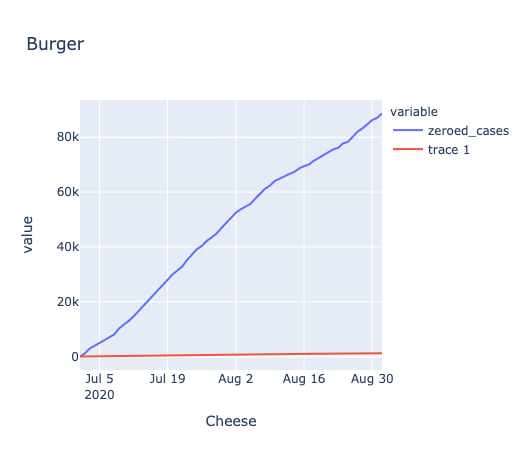

In [51]:
fig = px.line(state_df['zeroed_cases'], title='Burger')
fig.add_scatter(x=state_df.index, y = state_df['zeroed_deaths'])
fig.update_layout(xaxis_title='Cheese')
fig.show()

In [8]:
sme = pd.read_csv('sme.csv', index_col=0)
snap = pd.read_csv('two_month_snapshot.csv', index_col=0)

In [9]:
sme.head()

,STATE,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,mask_negative,mask_positive,votesDem,percD,votesRep,percR,electoralDem,electoralRep,Pop,blue,red
0,AK,0.053429,0.064643,0.092821,0.326393,0.462571,0.118071,0.788964,116454,36.55,163387,51.28,0,3,734002,0,1
1,AL,0.081567,0.081090,0.146612,0.215343,0.475313,0.162657,0.690657,729547,34.36,1318255,62.08,0,9,4908620,0,1
2,AR,0.090920,0.087253,0.138360,0.220627,0.462867,0.178173,0.683493,380494,33.65,684872,60.57,0,6,3039000,0,1
3,AZ,0.049667,0.053200,0.094667,0.147333,0.655000,0.102867,0.802333,1161167,45.13,1252401,48.67,0,11,7378490,0,1
4,CA,0.032310,0.030724,0.063690,0.158603,0.714638,0.063034,0.873241,8753788,61.73,4483810,31.62,55,0,39937500,1,0


In [11]:
snap.head()

,date,state,fips,cases,deaths,daily_new_cases,daily_new_deaths,zeroed_cases,zeroed_deaths
0,2020-07-01,Alabama,1,38962,972,0.0,0.0,0,0
1,2020-07-02,Alabama,1,40111,985,1149.0,13.0,1149,13
2,2020-07-03,Alabama,1,41865,1006,1754.0,21.0,2903,34
3,2020-07-04,Alabama,1,42862,1007,997.0,1.0,3900,35
4,2020-07-05,Alabama,1,43953,1007,1091.0,0.0,4991,35


In [35]:
mapper = us.states.mapping('abbr', 'name')

In [38]:
sme['state_name'] = sme['STATE'].apply(lambda x: mapper.get(x))

In [46]:
total = pd.merge(snap, sme, how='left', left_on='state', right_on='state_name' )

In [51]:
total['cases_per_capita'] = total['zeroed_cases'] / total['pop']

In [50]:
total['zeroed_cases'] = total['zeroed_cases'].apply(float)

In [52]:
total.head()

,date,state,fips,cases,deaths,daily_new_cases,daily_new_deaths,zeroed_cases,zeroed_deaths,pop,...,percD,votesRep,percR,electoralDem,electoralRep,Pop,blue,red,state_name,cases_per_capita
0,2020-07-01,Alabama,1,38962,972,0.0,0.0,0.0,0,0,...,34.36,1318255.0,62.08,0.0,9.0,4908620.0,0.0,1.0,Alabama,NaN
1,2020-07-02,Alabama,1,40111,985,1149.0,13.0,1149.0,13,0,...,34.36,1318255.0,62.08,0.0,9.0,4908620.0,0.0,1.0,Alabama,inf
2,2020-07-03,Alabama,1,41865,1006,1754.0,21.0,2903.0,34,0,...,34.36,1318255.0,62.08,0.0,9.0,4908620.0,0.0,1.0,Alabama,inf
3,2020-07-04,Alabama,1,42862,1007,997.0,1.0,3900.0,35,0,...,34.36,1318255.0,62.08,0.0,9.0,4908620.0,0.0,1.0,Alabama,inf
4,2020-07-05,Alabama,1,43953,1007,1091.0,0.0,4991.0,35,0,...,34.36,1318255.0,62.08,0.0,9.0,4908620.0,0.0,1.0,Alabama,inf
